4.1 Unipolar - NRZ Scheme

Normalized Power: 0.5 watts


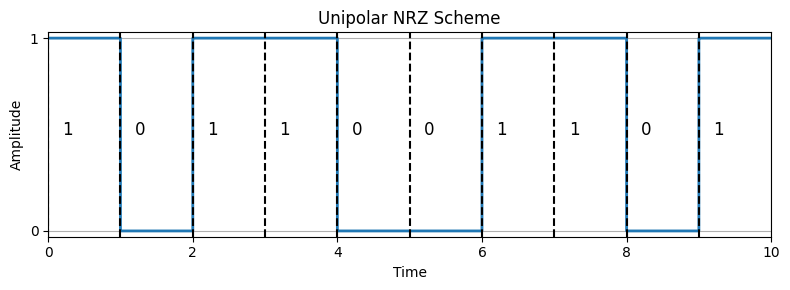

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def unipolar_nrz(data, bit_duration, high):
    time = np.arange(0, len(data) * bit_duration, bit_duration / 1000)
    signal = np.repeat(data, 1000) * int(high)  # Cast high to int to make amplitude an integer
    return time, signal

# Data and parameters
data = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
bit_duration = 1
high = 1  # Set high voltage to 1
low = 0

# Calculate normalized power
normalized_power = 1/2 * math.pow(int(high), 2) + 1/2 * math.pow(int(low), 2)
print(f"Normalized Power: {normalized_power} watts")

# Generate unipolar NRZ signal
time, signal = unipolar_nrz(data, bit_duration, high)

# Plot the unipolar NRZ signal
plt.figure(figsize=(8, 3))
plt.step(time, signal, where='post', linewidth=2)

# Set xlim to be tight around the data (removing extra padding on sides)
plt.xlim(0, len(data))  # Tight around the number of bits

plt.ylim(-0.03, 1.03)  # Adjust ylim to accommodate the high value
plt.yticks([0, high])  # Set y-ticks to only show integer values
plt.title("Unipolar NRZ Scheme")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Annotate the plot
for i in range(len(data)):
    plt.text(i + 0.2, high / 2, str(data[i]), fontsize=12, color='black')
    plt.axvline(i, color='black', linestyle='--')

plt.grid(True)
plt.tight_layout()  # Ensures that all elements fit within the figure
plt.show()


5.1 NRZ-L

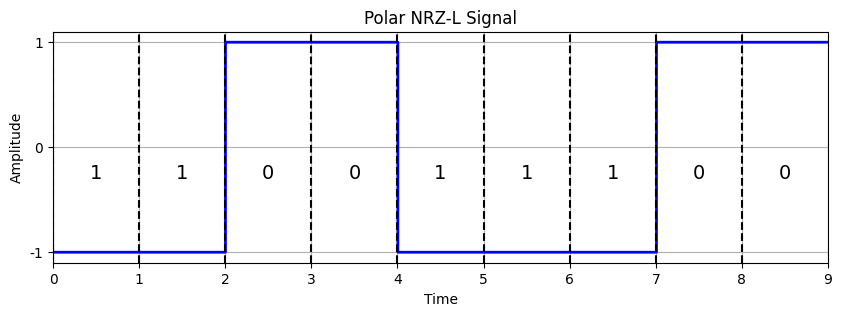

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_bits = [1, 1, 0, 0, 1, 1, 1, 0, 0]
n = len(data_bits)
bit_duration = 1

t = np.linspace(0, n, n * 100)
signal = np.zeros_like(t)

for i in range(n):
    if data_bits[i] == 0:
        signal[i * 100:(i + 1) * 100] = 1
    else:
        signal[i * 100:(i + 1) * 100] = -1

# Plot the waveform
plt.figure(figsize=(10, 3))
plt.step(t, signal, where='post', color='b', linewidth=2)

# Adjust ylim to provide extra space at the bottom
plt.ylim(-1.1, 1.1)  # Add margin below -1, and a small margin above 1
plt.xlim(0, len(data_bits))  # Tight around the number of bits

plt.title('Polar NRZ-L Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Format y-ticks to show integers only (no decimals)
plt.gca().set_yticks([-1, 0, 1])
plt.gca().set_yticklabels(['-1', '0', '1'])

# Annotate the plot
for i in range(len(data_bits)):
    plt.text(i + 0.5, -0.3, str(data_bits[i]), fontsize=14, ha='center')  # Move labels slightly lower
    plt.axvline(i, color='black', linestyle='--')  # Add vertical lines to indicate bit boundaries

plt.grid(True)
plt.show()


NRZ - I

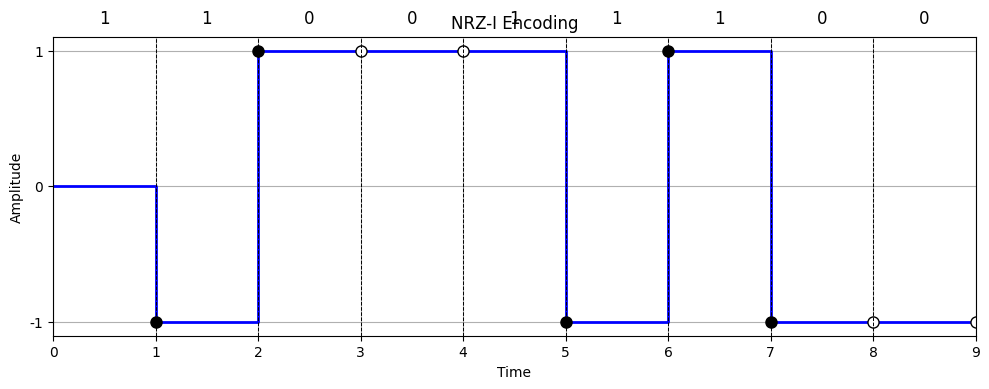

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def nrz_i_encode(data):
    time = np.arange(len(data) + 1)
    signal = np.zeros(len(data) + 1)
    last_level = 1

    for i in range(len(data)):
        if data[i] == 1:
            last_level = -last_level
        signal[i + 1] = last_level

    return time, signal

def plot_nrz_i(time, signal, data):
    plt.figure(figsize=(10, 4))
    plt.step(time, signal, where='post', color='blue', linewidth=2)

    for i in range(1, len(signal)):
        if signal[i] != signal[i-1]:
            plt.plot(time[i], signal[i], 'ko', markersize=8)
        else:
            plt.plot(time[i], signal[i], 'wo', markersize=8, markeredgecolor='black')

    for i in range(len(data)):
        plt.axvline(i, color='black', linestyle='--', linewidth=0.7)
        plt.text(i + 0.5, 1.2, str(data[i]), fontsize=12, color='black', ha='center')

    # Set plot limits and labels
    plt.ylim(-1.1, 1.1)  # Adjust ylim to fit the integer amplitudes closely
    plt.xlim(0, len(data_bits))  # Tight around the number of bits
    plt.xlim(0, len(data_bits))  # Tight around the number of bits

    plt.title('NRZ-I Encoding')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Set y-ticks to show integers only (no decimals)
    plt.gca().set_yticks([-1,0, 1])
    plt.gca().set_yticklabels(['-1',"0", '1'])

    plt.grid(True)
    plt.tight_layout()  # Minimize margins
    plt.show()

# Sample binary data to encode
data = [1, 1, 0, 0, 1, 1, 1, 0, 0]

# Generate NRZ-I signal
time, signal = nrz_i_encode(data)

# Plot the NRZ-I signal with transitions
plot_nrz_i(time, signal, data)


Example 3

In [ ]:
def av_signal_rate(N, R = 1):
    return 1/2 * N * R;


print(av_signal_rate(5000))


2500.0


Polar RZ scheme

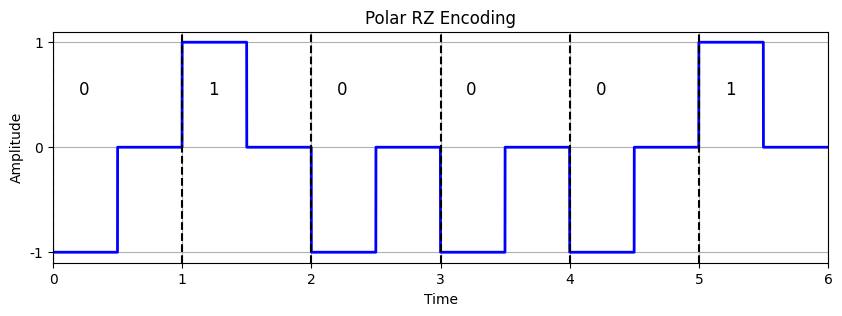

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Binary data input
data = [0, 1, 0, 0, 0, 1]

# Parameters
bit_time = 1  # Time duration of each bit
sampling_rate = 1000  # Samples per bit

# Time axis
t = np.arange(0, len(data) * bit_time, 1/sampling_rate)

# Signal generation
signal = np.zeros_like(t)
for i, bit in enumerate(data):
    if bit == 1:
        signal[i * sampling_rate:(i * sampling_rate) + sampling_rate // 2] = 1
    else:
        signal[i * sampling_rate:(i * sampling_rate) + sampling_rate // 2] = -1

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(t, signal, color='blue', lw=2)
plt.gca().set_yticks([-1,0, 1])
plt.gca().set_yticklabels(['-1',"0", '1'])
plt.ylim(-1.1, 1.1)
plt.xlim(0, len(data))
plt.title('Polar RZ Encoding')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Add grid lines to separate the bits
for i in range(len(data)):
    plt.axvline(i, color='black', linestyle='--')
    plt.text(i + 0.2, 0.5, str(data[i]), fontsize=12, color='black')

plt.grid(True)
plt.show()


Manchester

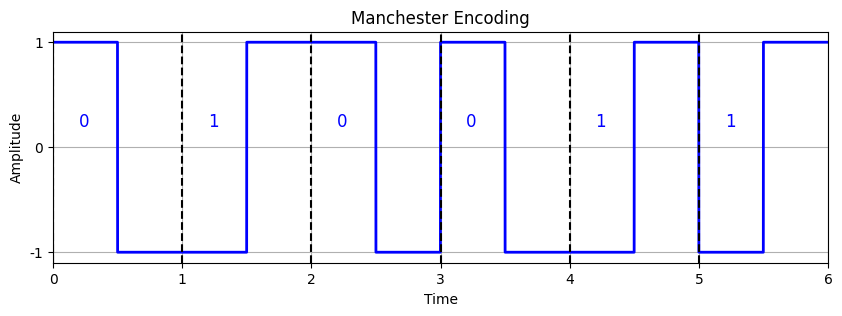

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [0, 1, 0, 0, 1, 1]

# Parameters
bit_time = 1  # Time duration of each bit
sampling_rate = 1000  # Samples per bit

# Time axis
t = np.arange(0, len(data) * bit_time, 1/sampling_rate)

# Signal generation for Manchester Encoding
signal = np.zeros_like(t)
for i, bit in enumerate(data):
    start = i * sampling_rate
    mid = start + sampling_rate // 2
    if bit == 1:
        signal[start:mid] = -1  # 1: low to high transition
        signal[mid:(i+1) * sampling_rate] = 1
    else:
        signal[start:mid] = 1   # 0: high to low transition
        signal[mid:(i+1) * sampling_rate] = -1

# Plotting Manchester Encoding
plt.figure(figsize=(10, 3))
plt.plot(t, signal, color='blue', lw=2)
plt.ylim(-1.1, 1.1)
plt.xlim(0, len(data))
plt.gca().set_yticks([-1,0, 1])
plt.gca().set_yticklabels(['-1',"0", '1'])
plt.title('Manchester Encoding')
plt.xlabel('Time')
plt.ylabel('Amplitude')


for i in range(len(data)):
    plt.axvline(i, color='black', linestyle='--')
    plt.text(i + 0.2, 0.2, str(data[i]), fontsize=12, color='blue')

plt.grid(True)
plt.show()


differential manchester

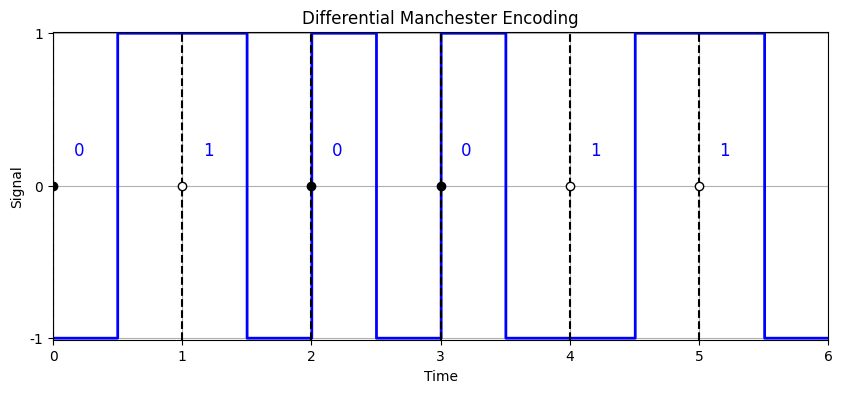

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bitstream = [0, 1, 0, 0, 1, 1]

bit_duration = 1
samples_per_bit = 100
total_samples = samples_per_bit * len(bitstream)
time = np.linspace(0, len(bitstream), total_samples)

encoded_signal = np.zeros(total_samples)
current_state = 1

for i, bit in enumerate(bitstream):
    start = i * samples_per_bit
    mid = start + samples_per_bit // 2
    end = (i + 1) * samples_per_bit

    # If the bit is 1, there is no inversion
    if bit == 1:
        encoded_signal[start:mid] = current_state
        encoded_signal[mid:end] = -current_state  # Transition to -1
    # If the bit is 0, invert at the start of the bit period
    else:
        current_state = -current_state  # Toggle the current state to -1
        encoded_signal[start:mid] = current_state
        encoded_signal[mid:end] = -current_state  # Transition to +1

    # Toggle state for the next half-bit period
    current_state = -current_state  # Alternate current state

plt.figure(figsize=(10, 4))
plt.plot(time, encoded_signal, drawstyle='steps-post', color='blue', linewidth=2)

for i in range(len(bitstream)):
    plt.axvline(i, color='black', linestyle='--')

    # Adjust the label to be exactly at the middle of the bit period
    plt.text(i + 0.2, 0.2, str(bitstream[i]), fontsize=12, color='blue', ha="center")

plt.grid(True)
plt.title("Differential Manchester Encoding")
plt.gca().set_yticks([-1, 0, 1])  # Update y-ticks to show -1 and +1
plt.gca().set_yticklabels(['-1', '0', '1'])  # Update y-tick labels
plt.xlabel("Time")
plt.ylabel("Signal")
plt.ylim(-1.01, 1.01)  # Update y-limit
plt.xlim(0, len(bitstream))

# Annotate the points of inversion and non-inversion at the edge before the transition
for i in range(len(bitstream)):
    start_time = i * bit_duration  # Start of the bit period
    if bitstream[i] == 0:
        plt.plot(start_time, 0, 'ko')  # Inversion at the edge (now represented by 0)
    else:
        plt.plot(start_time, 0, 'wo', markeredgecolor='black')  # No inversion at the edge (also represented by 0)

plt.show()


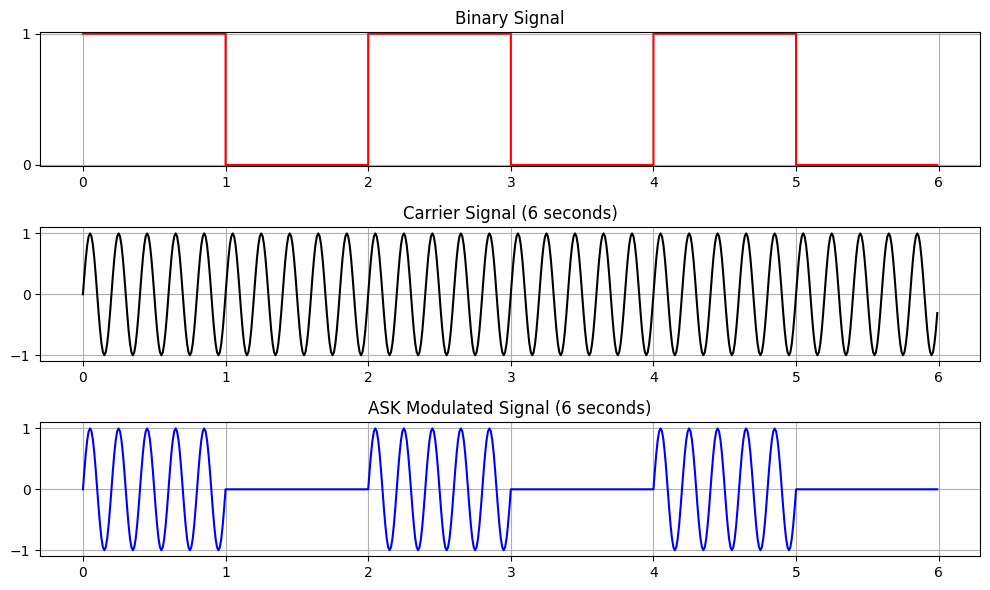

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
bitrate = 1  # bits per second (bps)
carrier_freq = 5  # frequency of the carrier signal (Hz)
sample_rate = 100  # samples per second
duration_per_bit = 1 / bitrate
total_duration = 6  # total duration for the entire signal (6 seconds)

# Binary signal (based on the image: '101010')
binary_signal = np.array([1, 0, 1, 0, 1, 0])

# Time vector for the entire signal
t = np.linspace(0, total_duration, int(total_duration * sample_rate), endpoint=False)

# Carrier signal for the entire 6 seconds
carrier = np.sin(2 * np.pi * carrier_freq * t)

# Expanded binary signal to match carrier signal length
expanded_binary_signal = np.repeat(binary_signal, int(sample_rate * duration_per_bit))

# Modulated signal (ASK)
modulated_signal = expanded_binary_signal * carrier

# Plot the results
plt.figure(figsize=(10, 6))


# Plot binary signal
plt.subplot(3, 1, 1)
plt.step(t, expanded_binary_signal, where='post', color='r')
plt.gca().set_yticks([-1, 0, 1])
plt.gca().set_yticklabels(['-1', '0', '1'])
plt.ylim(-0.01, 1.01)
plt.title("Binary Signal")
plt.grid(True)

# Plot carrier signal (spanning the entire 6 seconds)
plt.subplot(3, 1, 2)
plt.plot(t, carrier, color='black')
plt.title("Carrier Signal (6 seconds)")
plt.grid(True)

# Plot ASK modulated signal
plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal, color='blue')
plt.title("ASK Modulated Signal (6 seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()
